# Running pyqz II

This page is also available as an IPython notebook (``pyqz_demo_advanced.ipynb``) included with the code and located in ``pyqz/examples/``.

First things first, let's start by importing pyqz and pyqz_plots.

In [1]:
%matplotlib inline
import pyqz
import pyqz_plots

### D) Using custom MAPPINGS grids

While pyqz ships with a default set of HII region simulations from MAPPINGS, some (all!) users might be interested in using pyqz with their own specific sets of MAPPINGS simulations. pyqz was designed to be compatible with the grids generated from the awk script provided alongside MAPPINGS. 

<b>If one uses the awk script to create new MAPPINGS grids</b>, the resulting ``.csv`` file must be placed inside ``pyqz/reference_data/``. The filename must match what the function ``pyqz.pyqz_tools.get_MVphotogrid_fn()`` expects for your given set of parameters, e.g. should you have run a MAPPINGS model for $\log$(P/k)=6.7, plane-parralel HII regions and $\kappa=10$, the resulting grid name for the ``.csv`` file must be:

In [2]:
pyqz.pyqz_tools.get_MVphotogrid_fn(Pk=6.7, calibs='GCZO', kappa =10, struct='pp')

'/Users/fvogt/Tools/Python/fpav_pylib/pyqz/master_dev/src/../reference_data/grid_QZ_pp_GCZO_Pk67_k10.csv'

<b>If one does not use the awk script to generate the custom MAPPINGS grid</b>, then <i>just</i> make sure your model grid matches the format of existing model grids located in ``pyqz/reference_data/`` ...

### E) Resampling the original MAPPINGS grids

By default, 2 times resampled MAPPINGS grids are shipped with pyqz. These are generated using the function ``pyqz.pyqz_tools.resample_MVphotogrid()``, which is straightforward to use:

In [3]:
grid_fn = pyqz.pyqz_tools.get_MVphotogrid_fn(Pk=5.0,struct='sph', kappa='inf')
pyqz.pyqz_tools.resample_MVphotogrid(grid_fn, sampling=2)

 
  Success: grid_QZ_sph_GCZO_Pk50_kinf.csv resampled by a factor 2x2 and saved as grid_QZ_sph_GCZO_Pk50_kinf_samp_2.csv


More densely resampled grids can then easily be created by varying the ``sampling`` keyword.

### F) Projected 3-D line ratio diagrams

pyqz does support 2-D line ratio diagrams constructed from 3 sets of line ratios (i.e. 3-D line ratio diagrams projected to a given 2-D plane). For example, the diagnostic introduced in Dopita+ (2016) is:

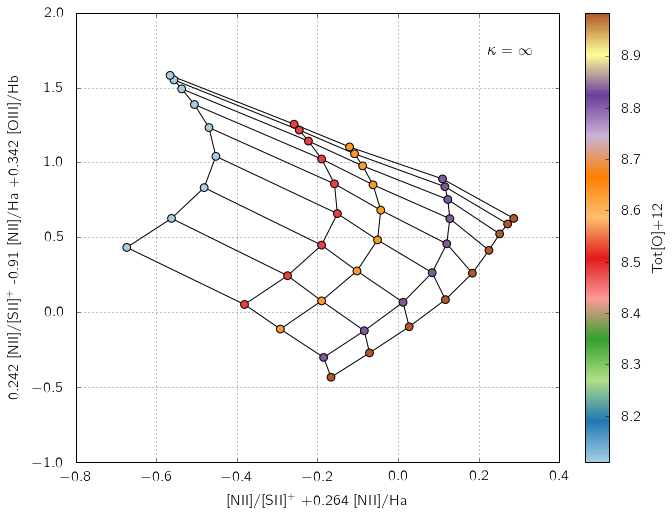

In [5]:
pyqz_plots.plot_grid('[NII]/[SII]+;[NII]/Ha;[OIII]/Hb',
                     coeffs = [[1.0,0.264,0.0],[0.242,-0.910,0.342]],
                     struct='sph',
                     sampling=1)